# EITC + CTC per child

## Setup

### Imports

In [1]:
import taxcalc as tc
import microdf as mdf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Constants

In [2]:
YEAR = 2019

### Utilities

In [3]:
def rt(rate, year=YEAR):
    return {year: rate}

RT_ZERO = rt(0)
RT_ONE = rt(1)
RT_4ZEROS = rt([0, 0, 0, 0])  # For EITC, split by number of children.
RT_5ZEROS = rt([0, 0, 0, 0, 0])  # For others, split by MARS.

In [4]:
REPEAL_CREDITS_REFORM = {
    'EITC_c': RT_4ZEROS,
#     'CTC_c': RT_ZERO,
#     'ACTC_c': RT_ZERO,
}

## Data

In [16]:
base = mdf.calc_df(year=YEAR, metric_vars=['EIC', 'nu18', 'n24'])[[
    'EIC', 'n24', 'nu18', 'n24_m', 'nu18_m', 'aftertax_income', 's006']]

In [17]:
reform = mdf.calc_df(year=YEAR, 
                     reform=REPEAL_CREDITS_REFORM)[['aftertax_income']]

In [18]:
base['aftertax_income_reform'] = reform.aftertax_income

In [22]:
base['tax_diff'] = base.aftertax_income - base.aftertax_income_reform
base['tax_diff_per_nu18'] = base.tax_diff / base.nu18
base['tax_diff_per_n24'] = base.tax_diff / base.n24
base['tax_diff_per_EIC'] = base.tax_diff / base.EIC

In [20]:
base[base.tax_diff_per_nu18 < np.inf].tax_diff_per_nu18.max()

6495.423292908465

In [21]:
base[base.tax_diff_per_n24 < np.inf].tax_diff_per_n24.max()

6575.050000000003

In [23]:
base[base.tax_diff_per_EIC < np.inf].tax_diff_per_EIC.max()

3538.5300000000134

In [24]:
base[base.tax_diff_per_nu18 < np.inf].sort_values(
    'tax_diff_per_nu18', ascending=False).head(10)

,EIC,n24,nu18,n24_m,nu18_m,aftertax_income,s006,aftertax_income_reform,tax_diff,tax_diff_per_nu18,tax_diff_per_n24,tax_diff_per_EIC
RECID,,,,,,,,,,,,
208027,3.0,1.0,1.0,0.001436,0.001436,21241.807524,1436.27,14746.384231,6495.423293,6495.423293,6495.423293,2165.141098
107340,2.0,1.0,1.0,0.000787,0.000787,102576.508688,786.67,96732.468688,5844.040000,5844.040000,5844.040000,2922.020000
451839,2.0,1.0,1.0,0.000076,0.000076,81218.770636,76.16,75374.730636,5844.040000,5844.040000,5844.040000,2922.020000
7334,2.0,1.0,1.0,0.001059,0.001059,116580.072732,1059.13,110736.032732,5844.040000,5844.040000,5844.040000,2922.020000
326626,2.0,1.0,1.0,0.001190,0.001190,87023.181462,1190.05,81179.141462,5844.040000,5844.040000,5844.040000,2922.020000
244115,2.0,1.0,1.0,0.001001,0.001001,103056.030816,1001.26,97211.990816,5844.040000,5844.040000,5844.040000,2922.020000
265830,2.0,1.0,1.0,0.000512,0.000512,71647.413434,511.68,65803.373434,5844.040000,5844.040000,5844.040000,2922.020000
370750,2.0,1.0,1.0,0.000155,0.000155,75045.555257,154.58,69201.515257,5844.040000,5844.040000,5844.040000,2922.020000
142926,2.0,1.0,1.0,0.000492,0.000492,84084.380867,492.42,78240.340867,5844.040000,5844.040000,5844.040000,2922.020000


In [12]:
def pct_kids_better_off(allowance):
    return (base[base.tax_diff_per_nu18 < allowance].nu18_m.sum() /
            base.nu18_m.sum())

In [13]:
X = np.arange(0, 8000, 100)
pct_kids_better_off_df = pd.Series([pct_kids_better_off(i) for i in X],
                                   index=X)

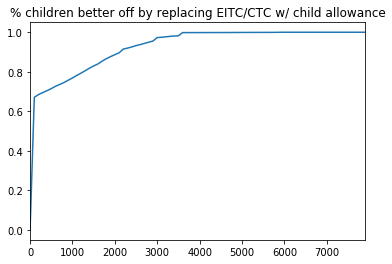

In [14]:
pct_kids_better_off_df.plot()
plt.title('% children better off by replacing EITC/CTC ' +
          'w/ child allowance')
plt.show()

In [15]:
pct_kids_better_off_df.loc[[4500, 6500]]

4500    0.998522
6500    1.000000
dtype: float64